<a href="https://colab.research.google.com/github/StudentsAntoniPartyka/ML/blob/main/Pd5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code from our class:

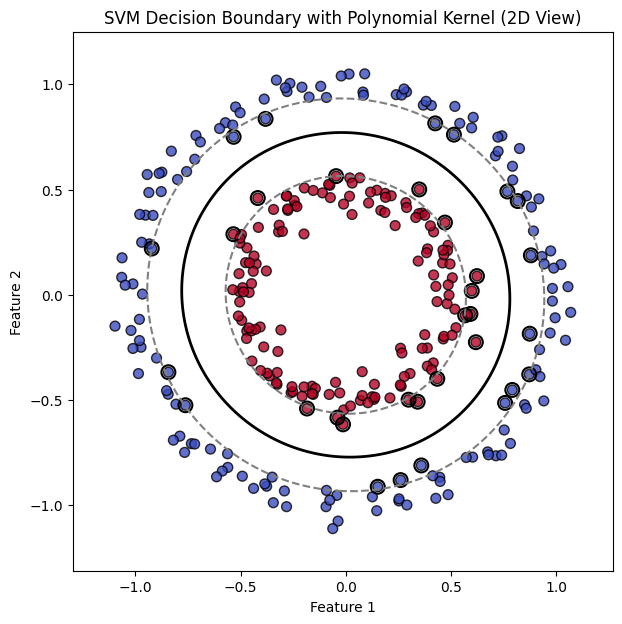

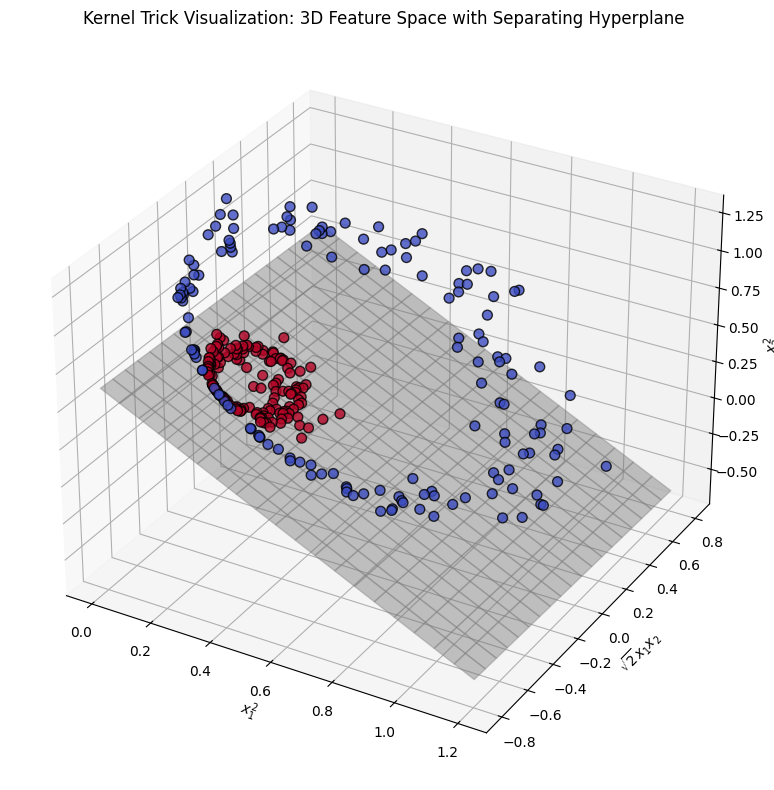

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-linearly separable circular data
samples, labels = make_circles(n_samples=300, factor=0.5, noise=0.05)
labels = np.where(labels == 0, -1, 1)  # Convert labels to -1 and 1 for SVM

# Initialize and train polynomial kernel SVM classifier
svm_model = SVC(kernel='poly', degree=2, C=1.0, gamma=1)
svm_model.fit(samples, labels)

# Create grid for decision boundary visualization
x_axis = np.linspace(samples[:, 0].min()-0.2, samples[:, 0].max()+0.2, 500)
y_axis = np.linspace(samples[:, 1].min()-0.2, samples[:, 1].max()+0.2, 500)
grid_x, grid_y = np.meshgrid(x_axis, y_axis)
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]

# Calculate decision values for the grid
decision_values = svm_model.decision_function(grid_points).reshape(grid_x.shape)

# Plot 2D decision boundary with margins
plt.figure(figsize=(10, 7))
plt.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='coolwarm',
            edgecolors='k', s=50, alpha=0.8)
plt.contour(grid_x, grid_y, decision_values, levels=[0],
            colors='black', linewidths=2)
plt.contour(grid_x, grid_y, decision_values, levels=[-1, 1],
            linestyles='dashed', colors='gray')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='black', linewidths=1.5)
plt.title('SVM Decision Boundary with Polynomial Kernel (2D View)')
plt.gca().set_aspect('equal')
plt.xlabel('Feature 1'), plt.ylabel('Feature 2')
plt.show()

# Define feature transformation for kernel trick visualization
def polynomial_features(x_point):
    """Maps 2D input space to 3D feature space using quadratic terms"""
    return np.array([x_point[0]**2, np.sqrt(2)*x_point[0]*x_point[1], x_point[1]**2])

# Transform data points and support vectors to 3D space
transformed_samples = np.array([polynomial_features(x) for x in samples])
transformed_support = np.array([polynomial_features(x) for x in svm_model.support_vectors_])

# Calculate hyperplane parameters using dual coefficients
weights = np.sum(svm_model.dual_coef_[0].reshape(-1, 1) * transformed_support, axis=0)
bias_term = svm_model.intercept_[0]

# Create 3D visualization of the separating hyperplane
fig_3d = plt.figure(figsize=(12, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Plot transformed data points
ax_3d.scatter(transformed_samples[:, 0], transformed_samples[:, 1], transformed_samples[:, 2],
              c=labels, cmap='coolwarm', edgecolors='k', s=50, alpha=0.8)

# Generate grid for hyperplane visualization
x_plane = np.linspace(transformed_samples[:, 0].min(), transformed_samples[:, 0].max(), 20)
y_plane = np.linspace(transformed_samples[:, 1].min(), transformed_samples[:, 1].max(), 20)
x_plane_grid, y_plane_grid = np.meshgrid(x_plane, y_plane)
z_plane_grid = (-weights[0]*x_plane_grid - weights[1]*y_plane_grid - bias_term) / weights[2]

# Plot the separating hyperplane
ax_3d.plot_surface(x_plane_grid, y_plane_grid, z_plane_grid,
                   alpha=0.4, color='silver', edgecolor='gray')

ax_3d.set_xlabel('$x_1^2$'), ax_3d.set_ylabel('$\sqrt{2}x_1x_2$'), ax_3d.set_zlabel('$x_2^2$')
ax_3d.set_title('Kernel Trick Visualization: 3D Feature Space with Separating Hyperplane')
plt.tight_layout()
plt.show()

Animation:

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

# Visualization constants
PLOT_DENSITY = 50
ANIMATION_FRAMES = 350
ROTATION_SPEED = 2

# Kernel feature mapping
def kernel_projection(point):
    """Maps 2D input to 3D polynomial feature space"""
    return np.array([point[0]**2,
                   np.sqrt(2)*point[0]*point[1],
                   point[1]**2])

# Generate and prepare data
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y = np.where(y == 0, -1, 1)  # Convert labels to SVM format

# Train polynomial kernel SVM
model = SVC(kernel='poly', degree=2, gamma=1, C=1)
model.fit(X, y)

# Transform data to feature space
X_trans = np.array([kernel_projection(x) for x in X])
support_trans = np.array([kernel_projection(v) for v in model.support_vectors_])

# Calculate decision surface parameters
weights = np.sum(model.dual_coef_[0].reshape(-1, 1) * support_trans, axis=0)
bias = model.intercept_[0]

# Initialize 3D visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create feature space grid
grid_points = np.array([kernel_projection(x)
                      for x in np.meshgrid(np.linspace(-1.5, 1.5, PLOT_DENSITY),
                                         np.linspace(-1.5, 1.5, PLOT_DENSITY))[0].reshape(-1, 2)])

# Visualize feature space
ax.scatter(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2],
          c='lightsteelblue', alpha=0.1, s=2, label='Feature Space')

# Add grid guidelines
for val in np.linspace(-1.5, 1.5, 15):
    line = np.array([[x, val] for x in np.linspace(-1.5, 1.5, 30)])
    line_trans = np.array([kernel_projection(p) for p in line])
    ax.plot(line_trans[:, 0], line_trans[:, 1], line_trans[:, 2],
           'gray', alpha=0.15)

# Plot transformed data
ax.scatter(X_trans[:, 0], X_trans[:, 1], X_trans[:, 2],
          c=y, cmap='coolwarm', edgecolors='k', s=70, alpha=0.95, label='Data Points')

# Generate decision surface
x_grid, y_grid = np.meshgrid(np.linspace(0, 2.5, PLOT_DENSITY),
                           np.linspace(-3, 3, PLOT_DENSITY))
z_grid = (-weights[0]*x_grid - weights[1]*y_grid - bias)/weights[2]
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.4,
               color='mediumseagreen', label='Decision Surface')

# Configure axes
ax.set_xlabel('$x_1^2$', fontsize=11)
ax.set_ylabel('$\sqrt{2}x_1x_2$', fontsize=11)
ax.set_zlabel('$x_2^2$', fontsize=11)
ax.set_title('3D Kernel Trick Visualization with Decision Surface', fontsize=13)
ax.legend()

# Animation function
def rotate_view(frame):
    ax.view_init(elev=25, azim=frame*ROTATION_SPEED)

# Generate and display animation
anim = animation.FuncAnimation(fig, rotate_view, frames=ANIMATION_FRAMES, interval=50)
plt.close()
HTML(anim.to_html5_video())

**ANSWER TO QUESTION 1**  

The SVM decision boundary is mathematically defined as a linear hyperplane in a 3D feature space, described by the equation:  

$$
\mathbf{w}^T \cdot \Phi(\mathbf{x}) + b = 0,  
$$  

where the feature transformation (parameterization) is given by:  

$$
\Phi(\mathbf{x}) = \begin{bmatrix}
x_1^2 \\
\sqrt{2} \, x_1 x_2 \\
x_2^2
\end{bmatrix}.  
$$  

The original 2D data is nonlinearly mapped to this 3D space via $\Phi(\mathbf{x})$, causing the transformed points to lie on a quadratic surface—specifically, a paraboloid embedded in $\mathbb{R}^3$. This geometric constraint has two critical implications:  

1. **Data Localization**: All transformed data points are confined to this curved surface rather than distributed freely across the 3D space.  
2. **Projection Effects**: While the SVM constructs a linear hyperplane in 3D, the *visible* decision boundary corresponds to its intersection with the paraboloid. This intersection manifests as a nonlinear curve (e.g., an ellipse or circle) when projected back to the original 2D input space.  

The apparent nonlinearity of the decision boundary in 2D arises from this geometric interplay: the hyperplane slices through the paraboloid at an angle, creating a curved intersection. Mathematically, this is equivalent to solving a nonlinear separation problem in the original space using linear methods in the transformed feature space—a hallmark of the kernel trick.  

Key observations:  
- The hyperplane itself remains strictly linear in 3D.  
- The nonlinear appearance in 2D stems from the combination of the feature mapping $\Phi(\mathbf{x})$ and the geometric constraints of the paraboloid.  
- This mechanism allows SVMs to handle complex decision boundaries while retaining convex optimization guarantees.  

This dual perspective—linearity in the feature space vs. nonlinearity in the input space—illustrates the mathematical elegance of kernel-based methods for nonlinear classification tasks.

**ANSWER TO QUESTION 2**  

The visualization demonstrates that the nonlinear mapping $\Phi(\mathbf{x})$ embeds the original 2D data space into a *constrained geometric manifold*—specifically, a paraboloidal surface within 3D space. This geometric transformation critically alters how separation occurs:  

### Key Geometric Relationships  
1. **Manifold Constraint**: All transformed data points reside exclusively on this quadratic surface rather than occupying the full 3D volume.  
2. **Hyperplane Interaction**: While SVMs construct linear decision boundaries in the feature space, this hyperplane intersects the paraboloid along a conic section (typically an ellipse or circle).  
3. **Dimensional Projection**: When inverse-mapped to 2D via $\Phi^{-1}$, this 3D intersection curve becomes the observed nonlinear decision boundary.  

### Mathematical Mechanism  
The apparent nonlinearity arises from two coupled effects:  
- **Manifold Geometry**: The paraboloid’s curvature forces any slicing hyperplane to intersect it along a quadratic curve.  
- **Dimensional Reduction**: Projecting this 3D intersection back to 2D preserves the curvature through the inverse transformation $\Phi^{-1}$, even though the separation remains linear in the feature space.  

### Implications for SVM  
- **Kernel Trick Realization**: This dual-space perspective operationalizes the kernel trick—linear operations in high dimensions induce nonlinear boundaries in the input space.  
- **Universal Separability**: By tuning $\Phi$ (via kernel selection), SVMs can adapt to increasingly complex data topologies while maintaining convex optimization guarantees.  
- **Geometric Intuition**: The paraboloid acts as a *separability catalyst*, converting nonlinear 2D problems into linearly solvable 3D configurations.  

### Critical Analysis  
Contrary to naive intuition, the SVM doesn’t “create” nonlinear boundaries—it *discovers them geometrically* through kernel-induced embeddings. The green decision curve in animations isn’t arbitrary but emerges from the precise alignment between:  
1. The hyperplane’s orientation in 3D  
2. The paraboloid’s curvature  
3. The inverse mapping’s topological preservation  

This geometric synergy explains why SVMs achieve nonlinear separation without explicit curve-fitting algorithms.